In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import LineString

from matplotlib.lines import Line2D

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [18]:
data_path = ''
data_path_NDC = data_path + 'NDC/'
data_path_NDC10 = data_path + 'NDC_10/'
data_path_NDC5 =data_path + 'NDC_5/'

plots_path = ''



rf_median_allscen = pd.read_csv(data_path + 'median_rf_csv/' + 'rf_med_allscen_2000.csv')
rf_q_17 = pd.read_csv(data_path + 'quantile_rf_csv/' + 'rf_q17_2000.csv')
rf_q_83 = pd.read_csv(data_path + 'quantile_rf_csv/' + 'rf_q83_2000.csv')

solar_rf_rcp2009 = pd.read_csv(data_path + 'solar_radiation/' + "HISTRCP2009_SOLAR_RF_mod.IN", sep = "\s+")



# CARBONCYCLE DATA
cc_data_NDC_noSRM = pd.read_csv(data_path_NDC + 'carboncycle/' + "CARBONCYCLE_NDC_Ca.OUT", sep = "\s+")
cc_data_NDC_SRM = pd.read_csv(data_path_NDC + 'carboncycle/' + "CARBONCYCLE_NDC_SCa.OUT", sep = "\s+")
cc_data_NDC10_noSRM = pd.read_csv(data_path_NDC10 + 'carboncycle/' + "CARBONCYCLE_NDC10_Ca.OUT", sep = "\s+")
cc_data_NDC10_SRM = pd.read_csv(data_path_NDC10 + 'carboncycle/' + "CARBONCYCLE_NDC10_SCa.OUT", sep = "\s+")
cc_data_NDC5_noSRM = pd.read_csv(data_path_NDC5 + 'carboncycle/' + "CARBONCYCLE_NDC5_Ca.OUT", sep = "\s+")
cc_data_NDC5_SRM = pd.read_csv(data_path_NDC5 + 'carboncycle/' + "CARBONCYCLE_NDC5_SCa.OUT", sep = "\s+")

In [19]:


plt.style.use('seaborn-paper')
plt.style.use('seaborn-whitegrid')

colours = sns.color_palette("tab20c")
colours_b = sns.color_palette("tab20b")

pd.set_option('display.max_columns', 50)

# Carbon cycle calculation

In [20]:

cc_data_NDC_SRM = cc_data_NDC_SRM[['YEARS', 'AIR2LAND_FLUX', 'AIR2OCEAN_FLUX']]
cc_data_NDC_SRM.to_csv(data_path + 'cc_data_NDC_SRM.csv', index=False, sep=',')

cc_data_NDC_noSRM = cc_data_NDC_noSRM[['YEARS', 'AIR2LAND_FLUX', 'AIR2OCEAN_FLUX']]
cc_data_NDC_noSRM.to_csv(data_path + 'cc_data_NDC_noSRM.csv', index=False, sep=',')

## New Carbon Cycle Plot 

In [21]:
## determine cum value until 2100, 2200, 2300 and 2400 for SRM and noSRM

cum_noSRM_CC = cc_data_NDC_noSRM.cumsum()
cum_noSRM_CC['YEARS'] = cc_data_NDC_noSRM.YEARS

cum_SRM_CC = cc_data_NDC_SRM.cumsum()
cum_SRM_CC['YEARS'] = cc_data_NDC_SRM.YEARS



land_NDC_2100_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2100), 'AIR2LAND_FLUX']
land_NDC_2200_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2200), 'AIR2LAND_FLUX']
land_NDC_2300_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2300), 'AIR2LAND_FLUX']
land_NDC_2400_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2400), 'AIR2LAND_FLUX']
land_NDC_2500_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2500), 'AIR2LAND_FLUX']

land_NDC_2100_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2100), 'AIR2LAND_FLUX']
land_NDC_2200_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2200), 'AIR2LAND_FLUX']
land_NDC_2300_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2300), 'AIR2LAND_FLUX']
land_NDC_2400_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2400), 'AIR2LAND_FLUX']
land_NDC_2500_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2500), 'AIR2LAND_FLUX']


ocean_NDC_2100_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2100), 'AIR2OCEAN_FLUX']
ocean_NDC_2200_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2200), 'AIR2OCEAN_FLUX']
ocean_NDC_2300_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2300), 'AIR2OCEAN_FLUX']
ocean_NDC_2400_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2400), 'AIR2OCEAN_FLUX']
ocean_NDC_2500_noSRM = cum_noSRM_CC.loc[(cum_noSRM_CC.YEARS == 2500), 'AIR2OCEAN_FLUX']

ocean_NDC_2100_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2100), 'AIR2OCEAN_FLUX']
ocean_NDC_2200_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2200), 'AIR2OCEAN_FLUX']
ocean_NDC_2300_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2300), 'AIR2OCEAN_FLUX']
ocean_NDC_2400_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2400), 'AIR2OCEAN_FLUX']
ocean_NDC_2500_SRM = cum_SRM_CC.loc[(cum_SRM_CC.YEARS == 2500), 'AIR2OCEAN_FLUX']



In [ ]:
diff_land_2100 = land_NDC_2100_noSRM - land_NDC_2100_SRM
diff_land_2200 = land_NDC_2200_noSRM - land_NDC_2200_SRM
diff_land_2300 = land_NDC_2300_noSRM - land_NDC_2300_SRM
diff_land_2400 = land_NDC_2400_noSRM - land_NDC_2400_SRM
diff_land_2500 = land_NDC_2500_noSRM - land_NDC_2500_SRM

diff_ocean_2100 = ocean_NDC_2100_noSRM - ocean_NDC_2100_SRM
diff_ocean_2200 = ocean_NDC_2200_noSRM - ocean_NDC_2200_SRM
diff_ocean_2300 = ocean_NDC_2300_noSRM - ocean_NDC_2300_SRM
diff_ocean_2400 = ocean_NDC_2400_noSRM - ocean_NDC_2400_SRM
diff_ocean_2500 = ocean_NDC_2500_noSRM - ocean_NDC_2500_SRM

net_diff_2100 = diff_land_2100 + diff_ocean_2100
net_diff_2200 = diff_land_2200 + diff_ocean_2200
net_diff_2300 = diff_land_2300 + diff_ocean_2300
net_diff_2400 = diff_land_2400 + diff_ocean_2400
net_diff_2500 = diff_land_2500 + diff_ocean_2500


fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [12, 5])

labels = ['2100', '2200', '2300', '2400', '2500']
diff_land = [diff_land_2100.item(), diff_land_2200.item(), diff_land_2300.item(), 
         diff_land_2400.item(), diff_land_2500.item()]
diff_ocean = [diff_ocean_2100.item(), diff_ocean_2200.item(), diff_ocean_2300.item(), 
         diff_ocean_2400.item(), diff_ocean_2500.item()]

net_diff = [net_diff_2100.item(), net_diff_2200.item(), net_diff_2300.item(), 
         net_diff_2400.item(), net_diff_2500.item()]


x = np.arange(len(labels))
barWidth = 0.15

r1 = np.arange(len(diff_land))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

def plot_cc(land, ocean, net):
    
    plt.bar(r1, land, color='black', width=barWidth, edgecolor='white', label='var1', alpha = 0.4)
    plt.bar(r2, ocean, color='lightgray', width=barWidth, edgecolor='white', label='var2', alpha = 0.9)
    plt.bar(r3, net, color='crimson', width=barWidth, edgecolor='white', label='var3')
    
    plt.title('Temporal evolution of difference in carbon fluxes with SRM vs without SRM',
              fontsize = 18).set_position([.5, 1.05])
    
    return plt

plot_cc(diff_land, diff_ocean, net_diff)

#ax.grid(False)

axes = plt.gca()
axes.xaxis.grid()

cust_lines = handles=[mpatches.Patch(color='darkgray', lw = 4),
                       mpatches.Patch(color='lightgray', lw = 4),
                       mpatches.Patch(color='crimson', lw = 4)]


ax.legend(cust_lines, ['Land', 'Ocean', 'Net Difference'], loc = 'upper left', fontsize = 14) 

ax.set_ylabel("[GtC]", fontsize = 14)
plt.xticks([r + barWidth for r in range(len(diff_land))], ['2100', '2200', '2300', '2400', '2500'])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax.set_ylim(-250, 250)

plt.savefig(plots_path + 'diff_cc.png', bbox_inches= 'tight', dpi = 300)

# SOLAR IRRADIANCE CALCULATION

## Prep probabilistic data

In [6]:



def df_prep_noSRM(df, drop_num):
    df.drop(df.index[:drop_num], inplace = True)
    df['YEARS'] = range(1765,2501)
    df.rename(columns={df.columns[1]: 'NDC10' }, inplace = True)
    df.rename(columns={df.columns[2]: 'NDC' }, inplace = True)
    df.rename(columns={df.columns[3]: 'NDC5' }, inplace = True)
    
    df = df.reset_index(drop = True)
    
    df[df.columns[1:]] = df[df.columns[1:]].astype(float)
    df = df[['YEARS', 'NDC', 'NDC10', 'NDC5']]
    
    return df


rf_median_allscen = df_prep_noSRM(rf_median_allscen, 7)

rf_q_17 = df_prep_noSRM(rf_q_17, 6)
rf_q_83 = df_prep_noSRM(rf_q_83, 6)

## New approach
## Calculation with median, q17, q83

In [8]:
def peak_shaving_calc_prob(rf_df, scen, shaving_level, start_SRM, end_SRM): 
    rf_df_new = rf_df[['YEARS', scen]]
    rf_df_new['shaved_rf'] = 0
    rf_df_new['over_rf'] = rf_df_new[scen] - shaving_level
    rf_df_new.loc[rf_df_new.over_rf < 0, 'over_rf'] = 0
    for ye in list(range(start_SRM, end_SRM)):
        rf_df_new.loc[(rf_df_new.YEARS == ye), 'shaved_rf'] = rf_df_new.loc[(rf_df_new.YEARS == ye), 'over_rf'].values.item()
    rf_df_new['cum_shaved_rf'] = rf_df_new['shaved_rf'].cumsum()
    return rf_df_new

rf_med_NDC = peak_shaving_calc_prob(rf_median_allscen, 'NDC', 2.2, 2034, 2318)  #2334
rf_med_NDC10 = peak_shaving_calc_prob(rf_median_allscen, 'NDC10', 2.2, 2034, 2331)  #2348
rf_med_NDC5 = peak_shaving_calc_prob(rf_median_allscen, 'NDC5', 2.2, 2034, 2400)  #2433
rf_q_17_NDC = peak_shaving_calc_prob(rf_q_17, 'NDC', 2.2, 2043, 2296)
rf_q_17_NDC10 = peak_shaving_calc_prob(rf_q_17, 'NDC10', 2.2, 2043, 2307)
rf_q_17_NDC5 = peak_shaving_calc_prob(rf_q_17, 'NDC5', 2.2, 2043, 2364)
rf_q_83_NDC = peak_shaving_calc_prob(rf_q_83, 'NDC', 2.2, 2027, 2443)
rf_q_83_NDC10 = peak_shaving_calc_prob(rf_q_83, 'NDC10', 2.2, 2027, 2456)
rf_q_83_NDC5 = peak_shaving_calc_prob(rf_q_83, 'NDC5', 2.2, 2027, 2500)


/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
    
def add_delta_rf(rf_df):
    solar_rf_rcp2009['solir_SRM'] = 0
    solar_rf = solar_rf_rcp2009.copy()
    for ye in rf_df.YEARS:
        solar_rf.loc[solar_rf.COLCODE == ye, 'solir_SRM'] = rf_df.loc[rf_df.YEARS == ye, 'shaved_rf'].values.item()

    # substract shaved RF from solar radiation
    solar_rf['mod_RF'] = solar_rf['GLOBAL'] - solar_rf['solir_SRM']
    
    return solar_rf
        

solar_rf_med_NDC = add_delta_rf( rf_med_NDC) 
solar_rf_med_NDC10 = add_delta_rf( rf_med_NDC10) 
solar_rf_med_NDC5 = add_delta_rf( rf_med_NDC5) 

solar_rf_q17_NDC = add_delta_rf( rf_q_17_NDC) 
solar_rf_q17_NDC10 = add_delta_rf( rf_q_17_NDC10) 
solar_rf_q17_NDC5 = add_delta_rf( rf_q_17_NDC5) 

solar_rf_q83_NDC = add_delta_rf( rf_q_83_NDC) 
solar_rf_q83_NDC10 = add_delta_rf( rf_q_83_NDC10) 
solar_rf_q83_NDC5 = add_delta_rf( rf_q_83_NDC5) 


# SRM adjustment 

In [10]:
solar_rf_med_NDC_adj = solar_rf_med_NDC.copy()
solar_rf_med_NDC10_adj = solar_rf_med_NDC10.copy()
solar_rf_med_NDC5_adj = solar_rf_med_NDC5.copy()

solar_rf_q17_NDC_adj = solar_rf_q17_NDC.copy()
solar_rf_q83_NDC_adj = solar_rf_q83_NDC.copy()

solar_rf_q17_NDC10_adj = solar_rf_q17_NDC10.copy()
solar_rf_q83_NDC10_adj = solar_rf_q83_NDC10.copy()

solar_rf_q17_NDC5_adj = solar_rf_q17_NDC5.copy()
solar_rf_q83_NDC5_adj = solar_rf_q83_NDC5.copy()


In [11]:

def solar_irrad_adjustment_5(solar_df, start_adjustment, start_1, end_1, plus_rf_1, start_2, end_2, plus_rf_2,
                           start_2b, end_2b, plus_rf_2b, start_3, end_3, plus_rf_3,
                            start_4, end_4, plus_rf_4):
    for ye in solar_df.COLCODE[start_1:end_1]: 
        solar_df.loc[solar_df.COLCODE == ye, 'mod_RF'] = solar_df.loc[(solar_df.COLCODE == (ye-1)), 'mod_RF'].values.item() + plus_rf_1  #541:591
    for ye in solar_df.COLCODE[start_2:end_2]: 
        solar_df.loc[solar_df.COLCODE == ye, 'mod_RF'] = solar_df.loc[(solar_df.COLCODE == (ye-1)), 'mod_RF'].values.item() + plus_rf_2 #0.026 #591:691
    for ye in solar_df.COLCODE[start_2b:end_2b]: #.isin(years_SRM):
        solar_df.loc[solar_df.COLCODE == ye, 'mod_RF'] = solar_df.loc[(solar_df.COLCODE == (ye-1)), 'mod_RF'].values.item() + plus_rf_2b #0.026 #591:691
    for ye in solar_df.COLCODE[start_3:end_3]: 
        solar_df.loc[solar_df.COLCODE == ye, 'mod_RF'] = solar_df.loc[(solar_df.COLCODE == (ye-1)), 'mod_RF'].values.item() + plus_rf_3 # 0.03
    for ye in solar_df.COLCODE[start_4:end_4]: 
        solar_df.loc[solar_df.COLCODE == ye, 'mod_RF'] = solar_df.loc[(solar_df.COLCODE == (ye-1)), 'mod_RF'].values.item() + plus_rf_4
        
    solar_df.loc[(solar_df.COLCODE > start_adjustment) & (solar_df.mod_RF > 0.121325), 'mod_RF'] = 0.121325
 #   solar_df.loc[(solar_df.COLCODE > 2250), 'mod_RF'] = 0.121325

    return solar_df
    
    
solar_rf_med_NDC5_adj = solar_irrad_adjustment_5(solar_rf_med_NDC5_adj, 2151, 
                                               541, 570, 0.017, 
                                               570, 590, 0.026, 
                                               587, 625, 0.011,
                                               625, 661, 0.018,
                                            661, 900, 0.009)

solar_rf_q17_NDC5_adj = solar_irrad_adjustment_5(solar_rf_q17_NDC5_adj, 2151, 
                                               541, 570, 0.017, 
                                               570, 590, 0.026, 
                                               587, 625, 0.011,
                                               625, 661, 0.018,
                                            661, 900, 0.009)

solar_rf_q83_NDC5_adj = solar_irrad_adjustment_5(solar_rf_q83_NDC5_adj, 2151, 
                                               541, 570, 0.017, 
                                               570, 590, 0.026, 
                                               587, 625, 0.011,
                                               625, 661, 0.018,
                                            661, 900, 0.009)



In [117]:
# EXPORT 

def solir_export(solar_df, data_path, save_name):
    solar_df = solar_df[['COLCODE', 'mod_RF']]
    solar_df.to_csv(data_path + 'solar_radiation/' + save_name, index = False, sep = "\t")
    return solar_df
    
solir_export(solar_rf_med_NDC, data_path_NDC, 'HISTRCP2009_SOLAR_RF_2318.IN')x
solir_export(solar_rf_med_NDC10, data_path_NDC10, 'HISTRCP2009_SOLAR_RF_2331.IN')x
solir_export(solar_rf_med_NDC5, data_path_NDC5, 'HISTRCP2009_SOLAR_RF_2400.IN')x

solir_export(solar_rf_q17_NDC, data_path_NDC, 'SOLAR_RF_2296.IN')
solir_export(solar_rf_q17_NDC10, data_path_NDC10, 'SOLAR_RF_2307.IN')
solir_export(solar_rf_q17_NDC5, data_path_NDC5, 'SOLAR_RF_2364.IN')
solir_export(solar_rf_q83_NDC, data_path_NDC, 'SOLAR_RF_2443.IN')
solir_export(solar_rf_q83_NDC10, data_path_NDC10, 'SOLAR_RF_2456.IN')
solir_export(solar_rf_q83_NDC5, data_path_NDC5, 'SOLAR_RF_2500.IN')

solir_export(solar_rf_med_NDC_adj, data_path_NDC, 'SOLAR_RF_2318_adj.IN')x
solir_export(solar_rf_med_NDC10_adj, data_path_NDC10, 'SOLAR_RF_2331_adj.IN')x
solir_export(solar_rf_med_NDC5_adj, data_path_NDC5, 'SOLAR_RF_2400_adj.IN')x

solir_export(solar_rf_q17_NDC_adj, data_path_NDC, 'SOLAR_RF_2296_adj.IN')x
solir_export(solar_rf_q17_NDC10_adj, data_path_NDC10, 'SOLAR_RF_2307_adj.IN')x
solir_export(solar_rf_q17_NDC5_adj, data_path_NDC5, 'SOLAR_RF_2400_17_adj.IN')x
solir_export(solar_rf_q83_NDC_adj, data_path_NDC, 'SOLAR_RF_2443_adj.IN')x
solir_export(solar_rf_q83_NDC10_adj, data_path_NDC10, 'SOLAR_RF_2456_adj.IN')x
solir_export(solar_rf_q83_NDC5_adj, data_path_NDC5, 'SOLAR_RF_2499_17_adj.IN')x



,COLCODE,mod_RF
0,1610,0.014979
1,1611,0.048317
2,1612,0.092933
3,1613,0.109243
4,1614,0.090999
...,...,...
986,2596,0.121325
987,2597,0.121325
988,2598,0.121325
989,2599,0.121325


<Figure size 1584x1584 with 0 Axes>

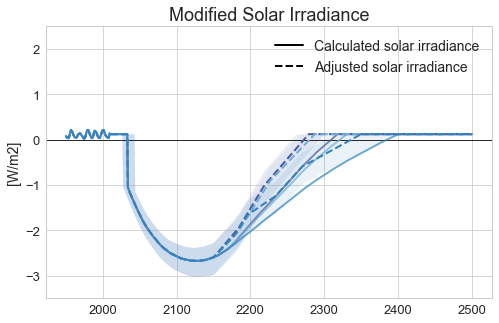

In [16]:
# MODIFIED SOLAR RADIATION PLOT

#def plot_mod_solar_rad(df_solar_rf)

fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [8, 5])

ax.axhline(linewidth=0.8, color='black')

def solir_plot(df_solar, col, linsty, alp):
    ax.plot(df_solar.COLCODE, df_solar.mod_RF, 
        linewidth = 2, color = col, linestyle = linsty, alpha = alp)
    return ax


solir_plot(solar_rf_med_NDC[340:891], colours_b[1], '-', 0.7)
solir_plot(solar_rf_med_NDC10[340:891], colours[1], '-', 0.7)
solir_plot(solar_rf_med_NDC5[340:891], colours[0], '-', 0.7)

solir_plot(solar_rf_med_NDC_adj[340:891], colours_b[1], '--', 1)
solir_plot(solar_rf_med_NDC10_adj[340:891], colours[1], '--', 1)
solir_plot(solar_rf_med_NDC5_adj[340:891], colours[0], '--', 1)


#solir_plot(solar_rf_med_NDC5_adj, colours[0], '--')

def solir_ranges(df_solar_17, df_solar_83, col):
    ax.fill_between(
        df_solar_17.COLCODE,
        df_solar_17.mod_RF,
        df_solar_83.mod_RF,
        color = col,
        alpha = 0.1,
        zorder = 1.5)
    return ax

#solir_ranges(solar_rf_q17_NDC[155:891], solar_rf_q83_NDC[155:891], colours_b[1])
#solir_ranges(solar_rf_q17_NDC10[155:891], solar_rf_q83_NDC10[155:891], colours[1])
#solir_ranges(solar_rf_q17_NDC5[155:891], solar_rf_q83_NDC5[155:891], colours[0])

solir_ranges(solar_rf_q17_NDC_adj[340:891], solar_rf_q83_NDC_adj[340:891], colours_b[1])   #colours_b[1]
solir_ranges(solar_rf_q17_NDC5_adj[340:891], solar_rf_q83_NDC5_adj[340:891], colours[0])    #colours[0]
solir_ranges(solar_rf_q17_NDC10_adj[340:891], solar_rf_q83_NDC10_adj[340:891], colours[1])    #colours[1]


#ax.plot(rf_NDC.COLCODE, solar_rf_rcp.mod_RF, label = 'temp diff', linewidth = 0.4)
ax.set_ylim(-3.5, 2.5)
#ax.set_xlim(1701,2540)

custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


#leg1 = ax.legend(custom_lines, [  'CDR -11.5', 'CDR -10','CDR -5'], fontsize = 12);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);

cust_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, ls = '--')]

ax.legend(cust_lines, ['Calculated solar irradiance', 'Adjusted solar irradiance'],
          loc = 'upper right', fontsize = 14) 
#ax.add_artist(leg1)


plt.title(
    "Modified Solar Irradiance", fontsize = 18)
    
ax.set_ylabel("[W/m2]", fontsize = 14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig(plots_path + 'solir_ranges_allscen_Sa.png', bbox_inches= 'tight', dpi = 300);


## Quantification of removed RF through SRM


## volcanic RF calculation